In [1]:
import pandas as pd

input_file = 'final.csv'
df = pd.read_csv(input_file)

author_reference_matrix = df.pivot_table(index='author_of_book', columns='full_author_referenced', aggfunc='size', fill_value=0)

authors_making_references = author_reference_matrix.sum(axis=1)

authors_referenced = author_reference_matrix.sum(axis=0)

top_30_authors_making_references = authors_making_references.sort_values(ascending=False).head(20)

top_10_authors_referenced = authors_referenced.sort_values(ascending=False).head(20)

print("Top 20 Authors Who Made the Most References:")
for author, count in top_30_authors_making_references.items():
    print(f"{author}: {count} references made")

print("\nTop 20 Authors Who Were Referenced the Most:")
for author, count in top_10_authors_referenced.items():
    print(f"{author}: {count} references received")

Top 20 Authors Who Made the Most References:
Grote, George: 13203 references made
Tyerman, L. (Luke): 4661 references made
Hegel, Georg Wilhelm Friedrich: 3777 references made
Aquinas: 3736 references made
Dewey: 2628 references made
Frazer: 2598 references made
Grisar, Hartmann: 2522 references made
Schopenhauer, Arthur: 2308 references made
Ingersoll, Robert Green: 2238 references made
Nietzsche, Friedrich Wilhelm: 2057 references made
Blavatsky: 1890 references made
Voltaire: 1849 references made
Croce: 1800 references made
Plutarch: 1731 references made
Falckenberg: 1663 references made
Westermarck, Edward: 1646 references made
Husik, Isaac: 1415 references made
Mill, John Stuart: 1223 references made
Hume, David: 1214 references made
Santayana, George: 1214 references made

Top 20 Authors Who Were Referenced the Most:
Plato: 15725 references received
Aristotle: 8997 references received
Augustine: 5578 references received
Kant, Immanuel: 4710 references received
Whitefield, George:

In [2]:
# Step 1: Identify the top 30 authors who were referenced the most
top_30_authors_referenced = authors_referenced.sort_values(ascending=False).head(30)

# Step 2: Filter the dataframe for rows corresponding to these top 30 authors
top_30_authors_df = df[df['full_author_referenced'].isin(top_30_authors_referenced.index)]

top_30_author_contexts = {}
for author in top_30_authors_referenced.index:
    # Get up to 30 context texts for each author
    author_contexts = top_30_authors_df[top_30_authors_df['full_author_referenced'] == author]['context'].head(30).tolist()
    top_30_author_contexts[author] = author_contexts

In [4]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

In [5]:
#  pre-trained BERT model for sentence embeddings
model = SentenceTransformer('bert-base-nli-mean-tokens')

author_embeddings = {}

# loop over each author
for author, contexts in top_30_author_contexts.items():
    # compute embeddings for the list of contexts
    embeddings = model.encode(contexts)
    author_embeddings[author] = embeddings

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
# ombine all embeddings into a single numpy array and store their corresponding labels
all_embeddings = []
labels = []

for author, embeddings in author_embeddings.items():
    all_embeddings.extend(embeddings)
    labels.extend([author] * len(embeddings))

all_embeddings = np.array(all_embeddings)

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


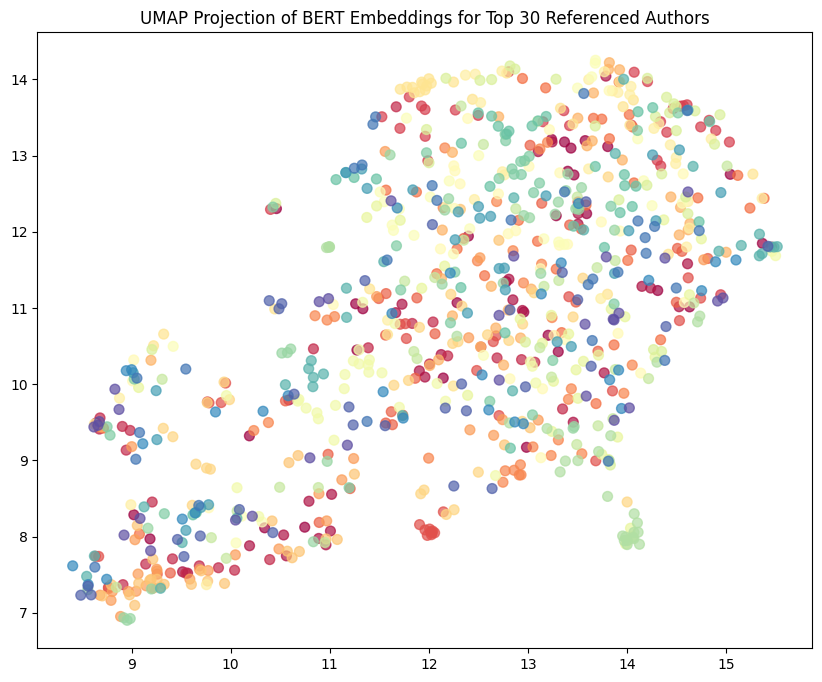

In [8]:

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(all_embeddings)

# plot the UMAP visualization
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=[labels.index(label) for label in labels], cmap='Spectral', s=50, alpha=0.7)
plt.title("UMAP Projection of BERT Embeddings for Top 30 Referenced Authors")
plt.show()

In [10]:

top_50_authors_referenced = authors_referenced.sort_values(ascending=False).head(50)

# filter the dataframe for rows corresponding to these top 50 authors
top_50_authors_df = df[df['full_author_referenced'].isin(top_50_authors_referenced.index)]

# For each of these authors, get up to 50 contexts
top_50_author_contexts = {}
for author in top_50_authors_referenced.index:
    # get up to 50 context texts for each author
    author_contexts = top_50_authors_df[top_50_authors_df['full_author_referenced'] == author]['context'].head(50).tolist()
    top_50_author_contexts[author] = author_contexts


In [11]:
# Load the pre-trained BERT model for sentence embeddings
model = SentenceTransformer('bert-base-nli-mean-tokens')

#  Create a dictionary to store embeddings for the 50 authors
author_embeddings = {}

# Loop over each author and generate embeddings for their contexts
for author, contexts in top_50_author_contexts.items():
    # Compute embeddings for the list of contexts
    embeddings = model.encode(contexts)
    author_embeddings[author] = embeddings

In [ ]:
# Step 5: Combine all embeddings into a single numpy array and store their corresponding labels
all_embeddings = []
labels = []

for author, embeddings in author_embeddings.items():
    all_embeddings.extend(embeddings)
    labels.extend([author] * len(embeddings))

# Convert to a NumPy array
all_embeddings = np.array(all_embeddings)

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


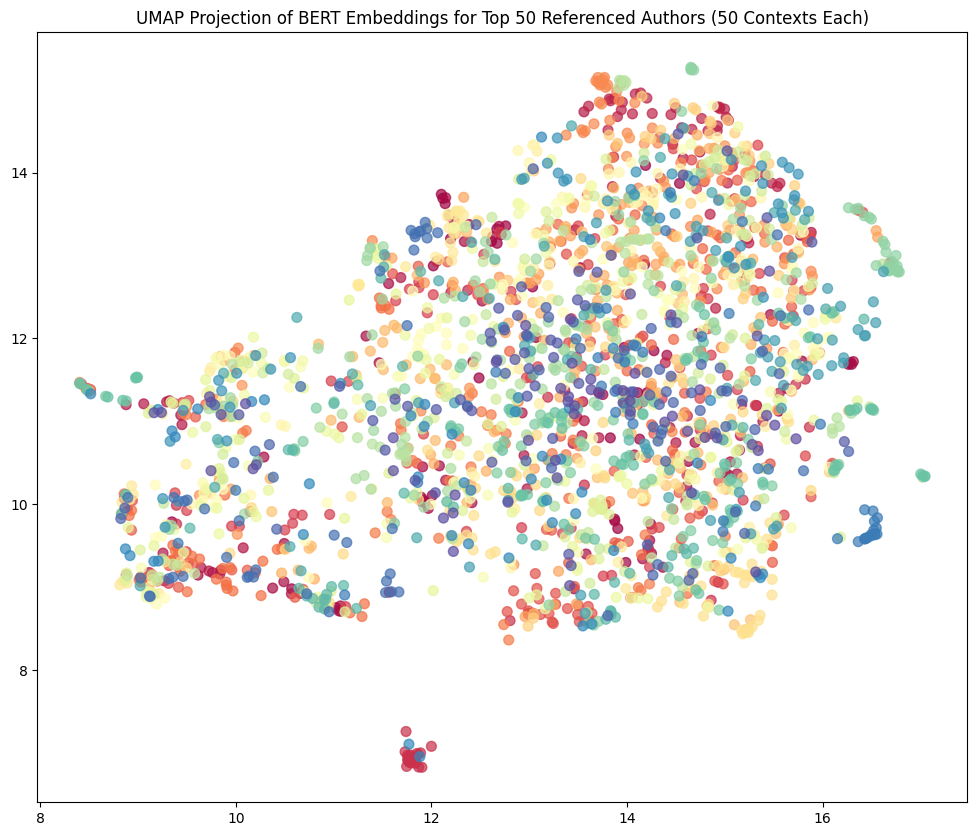

In [14]:
# Step 6: Initialize and fit UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(all_embeddings)

# Step 7: Plot the UMAP visualization
plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=[labels.index(label) for label in labels], cmap='Spectral', s=50, alpha=0.7)
plt.title("UMAP Projection of BERT Embeddings for Top 50 Referenced Authors (50 Contexts Each)")
plt.show()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


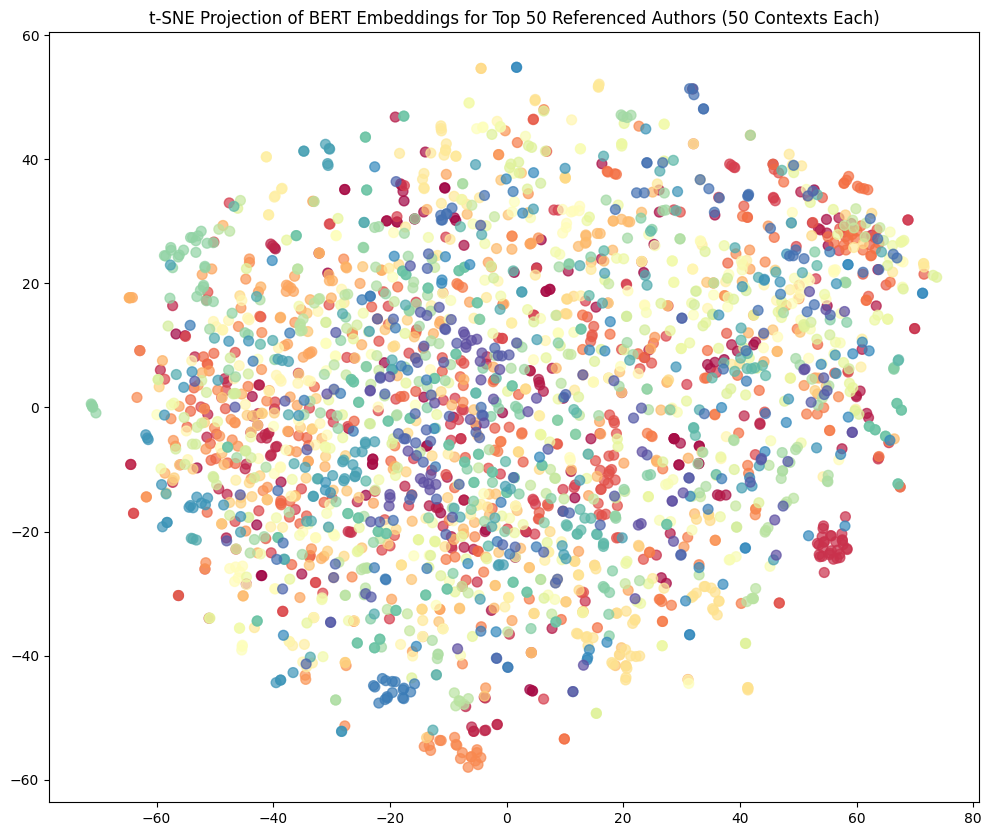

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Initialize and fit t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_embeddings = tsne_model.fit_transform(all_embeddings)

# Step 2: Plot the t-SNE visualization
plt.figure(figsize=(12, 10))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=[labels.index(label) for label in labels], cmap='Spectral', s=50, alpha=0.7)
plt.title("t-SNE Projection of BERT Embeddings for Top 50 Referenced Authors (50 Contexts Each)")
plt.show()

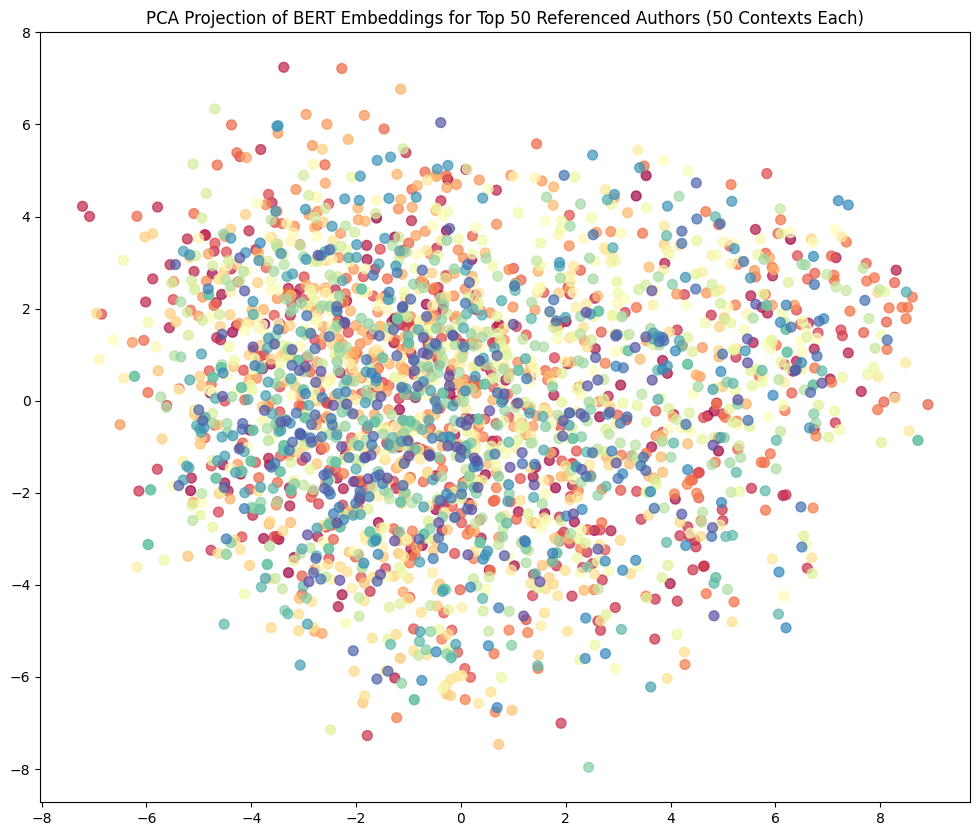

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_model = PCA(n_components=2)
pca_embeddings = pca_model.fit_transform(all_embeddings)

plt.figure(figsize=(12, 10))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=[labels.index(label) for label in labels], cmap='Spectral', s=50, alpha=0.7)
plt.title("PCA Projection of BERT Embeddings for Top 50 Referenced Authors (50 Contexts Each)")
plt.show()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


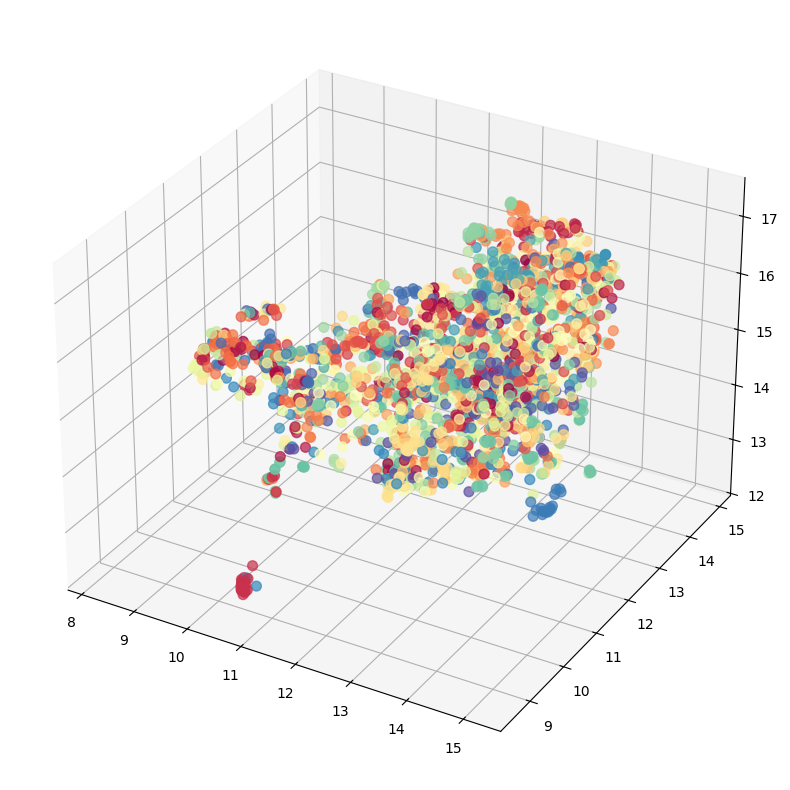

In [19]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Initialize and fit UMAP for 3D
umap_model_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
umap_embeddings_3d = umap_model_3d.fit_transform(all_embeddings)

# Step 2: Plot the UMAP visualization in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use scatter to plot in 3D space
scatter = ax.scatter(umap_embeddings_3d[:, 0], umap_embeddings_3d[:, 1], umap_embeddings_3d[:, 2], 
                     c=[labels.index(label) for label in labels], cmap='Spectral', s=50, alpha=0.7)

# Show the plot
plt.show()

In [20]:
from sklearn.cluster import KMeans

# Step 1: Determine the number of clusters (e.g., 10 for now)
n_clusters = 10  # You can change this value based on your preference

# Step 2: Run K-means clustering on the embeddings
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(all_embeddings)

# Step 3: Print out the cluster centers
print("K-means cluster centers:\n", kmeans.cluster_centers_)

K-means cluster centers:
 [[-0.15628973  0.9294281   0.4708377  ...  0.35850433  0.01439717
   0.37846622]
 [-0.5150197   0.8002398   0.35052636 ...  0.28091314  0.6856004
   0.11453296]
 [-0.11386463  0.85140425  0.58998173 ...  0.18336856 -0.30522877
   0.5306917 ]
 ...
 [-0.14217314  1.0304148   0.39345416 ...  0.42942667  0.4370693
   0.26284614]
 [-0.30455983  0.7144828   0.43977413 ... -0.01814166  0.23477814
   0.32586896]
 [-0.4110503   0.699721    0.5133634  ...  0.3418538   0.17640226
   0.28399065]]


/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


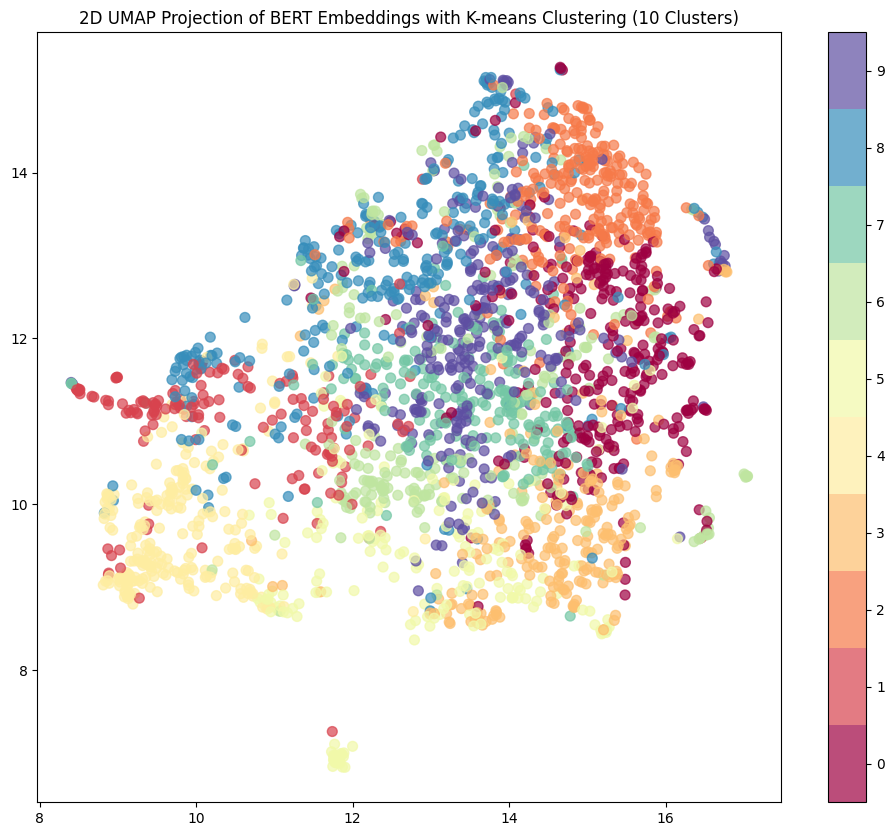

In [21]:
# Step 4: Use UMAP to reduce embeddings to 2D for visualization (if not already done)
umap_model_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings_2d = umap_model_2d.fit_transform(all_embeddings)

# Step 5: Plot the UMAP visualization in 2D with K-means clusters
plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings_2d[:, 0], umap_embeddings_2d[:, 1], c=cluster_labels, cmap='Spectral', s=50, alpha=0.7)

plt.colorbar(boundaries=np.arange(n_clusters + 1) - 0.5).set_ticks(np.arange(n_clusters))
plt.title(f"2D UMAP Projection of BERT Embeddings with K-means Clustering ({n_clusters} Clusters)")
plt.show()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


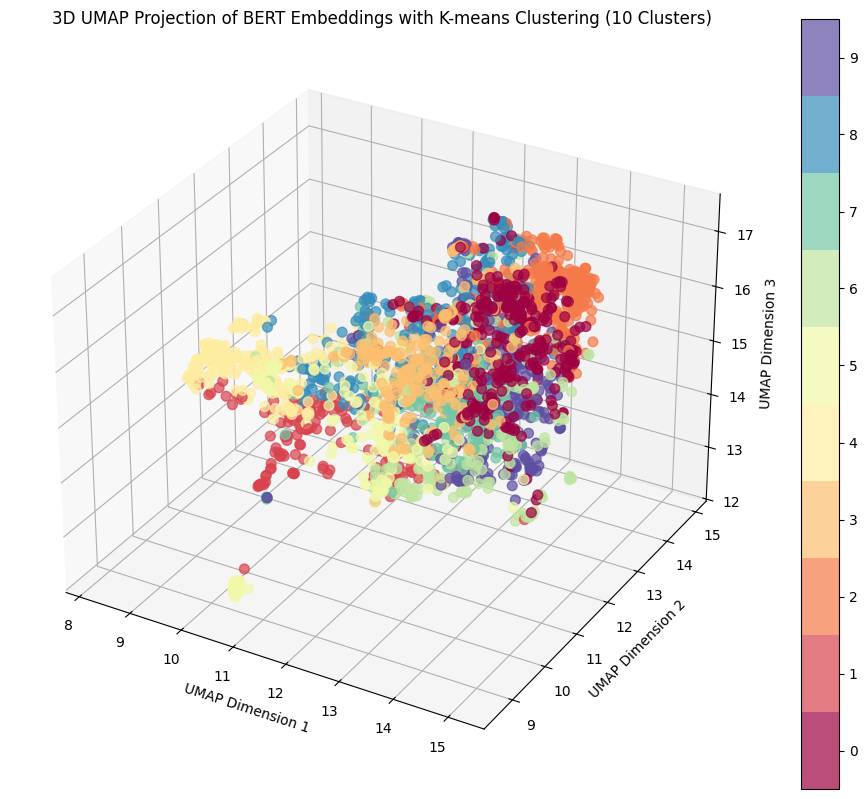

In [22]:
# Step 6: Use UMAP to reduce embeddings to 3D for visualization
umap_model_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
umap_embeddings_3d = umap_model_3d.fit_transform(all_embeddings)

# Step 7: plot the UMAp visualization in 3D with K-means clusters
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# scatter to plot in 3D space
scatter = ax.scatter(umap_embeddings_3d[:, 0], umap_embeddings_3d[:, 1], umap_embeddings_3d[:, 2], 
                     c=cluster_labels, cmap='Spectral', s=50, alpha=0.7)


fig.colorbar(scatter, ax=ax, boundaries=np.arange(n_clusters + 1) - 0.5).set_ticks(np.arange(n_clusters))
ax.set_title(f"3D UMAP Projection of BERT Embeddings with K-means Clustering ({n_clusters} Clusters)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

plt.show()

In [27]:
# Step 1: Create a dictionary to store references for each cluster
cluster_contexts = {i: [] for i in range(n_clusters)}

# Step 2: Group contexts by their assigned cluster, along with both referencing and referenced authors
for i, label in enumerate(cluster_labels):
    # Find the context corresponding to this embedding & its referencing and referenced authors
    author_of_book = df.iloc[i]['author_of_book']  # The author who made the reference
    referenced_author = df.iloc[i]['full_author_referenced']  # The author being referenced
    context = df.iloc[i]['context']  #  actual context

    # store the referencing author, referenced author, and the context in the cluster context dictionary
    cluster_contexts[label].append((author_of_book, referenced_author, context))

# Step 3: Print 3 unique referencing and 3 unique referenced authors with their context examples per cluster
for cluster_num in range(n_clusters):
    print(f"\nCluster {cluster_num}:\n")
    
    # Get the contexts for this cluster
    cluster_data = cluster_contexts[cluster_num]
    
    # Step 4: Get 3 unique referencing authors and 3 unique referenced authors
    unique_referencing_authors = {}
    unique_referenced_authors = {}

    # Find unique referencing authors and referenced authors, collecting 3 examples for each
    for referencing_author, referenced_author, context in cluster_data:
        if len(unique_referencing_authors) < 3 and referencing_author not in unique_referencing_authors:
            unique_referencing_authors[referencing_author] = (referenced_author, context)
        
        # only collect different referenced authors (distinct from referencing authors)
        if len(unique_referenced_authors) < 3 and referenced_author not in unique_referenced_authors:
            unique_referenced_authors[referenced_author] = (referencing_author, context)

        if len(unique_referencing_authors) == 3 and len(unique_referenced_authors) == 3:
            break
    
    # Step 5: 3 examples from different referencing authors
    print("3 Unique Authors Referencing Others:\n")
    for referencing_author, (referenced_author, context) in unique_referencing_authors.items():
        print(f"Referencing Author: {referencing_author}, Referenced Author: {referenced_author}")
        print(f"Context: {context[:200]}...\n")  # first 200 characters of the context for readability

    # Step 6: 3 examples from different referenced authors
    print("\n3 Unique Authors Being Referenced:\n")
    for referenced_author, (referencing_author, context) in unique_referenced_authors.items():
        print(f"Referenced Author: {referenced_author}, Referencing Author: {referencing_author}")
        print(f"Context: {context[:200]}...\n")  # first 200 characters of the context for reada


Cluster 0:

3 Unique Authors Referencing Others:

Referencing Author: Buchanan, Referenced Author: Berkeley
Context: existence of unthinking things without any relation to their being perceived" is an absurd or impossible supposition; that "their _esse_ is _percipi_," that is, that their being consists in their bein...

Referencing Author: Higginson, Thomas Wentworth, Referenced Author: Seneca, Lucius Annaeus
Context: apons should be laid aside, and all men love one another. "nature has inclined us to love men," said cicero, "and this is the foundation of the law." he also described his favorite virtue of justice a...

Referencing Author: Ingersoll, Robert Green, Referenced Author: Cobbett
Context: ale, philip graves, m. d., willet hicks, a. c. hankinson, john hogeboom, w. j. hilton, tames cheetham, revs. milledollar and cunningham, mrs. hedden, andrew a. dean, william carver,--the statements of...


3 Unique Authors Being Referenced:

Referenced Author: Berkeley, Referencing Author: 

In [ ]:

all_authors = df['full_author_referenced'].unique()
author_contexts_25 = {}

# Loop through all authors
for author in all_authors:
    # Filter the df
    author_df = df[df['full_author_referenced'] == author]
    contexts = author_df['context'].head(25).tolist()
    author_contexts_25[author] = contexts

# total number of authors to verify if each author has up to 25 contexts
print(f"Total number of unique authors: {len(all_authors)}")

Total number of unique authors: 403


In [ ]:
# pre-trained BERT model for sentence embeddings
model = SentenceTransformer('bert-base-nli-mean-tokens')
new_author_embeddings = []
new_labels = []
for author, contexts in author_contexts_25.items():
    # Generate BERT embeddings
    embeddings = model.encode(contexts)
    new_author_embeddings.extend(embeddings)
    new_labels.extend([author] * len(embeddings)) 

new_author_embeddings = np.array(new_author_embeddings)

print(f"Total number of embeddings generated: {len(new_author_embeddings)}")

Total number of embeddings generated: 7248


/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


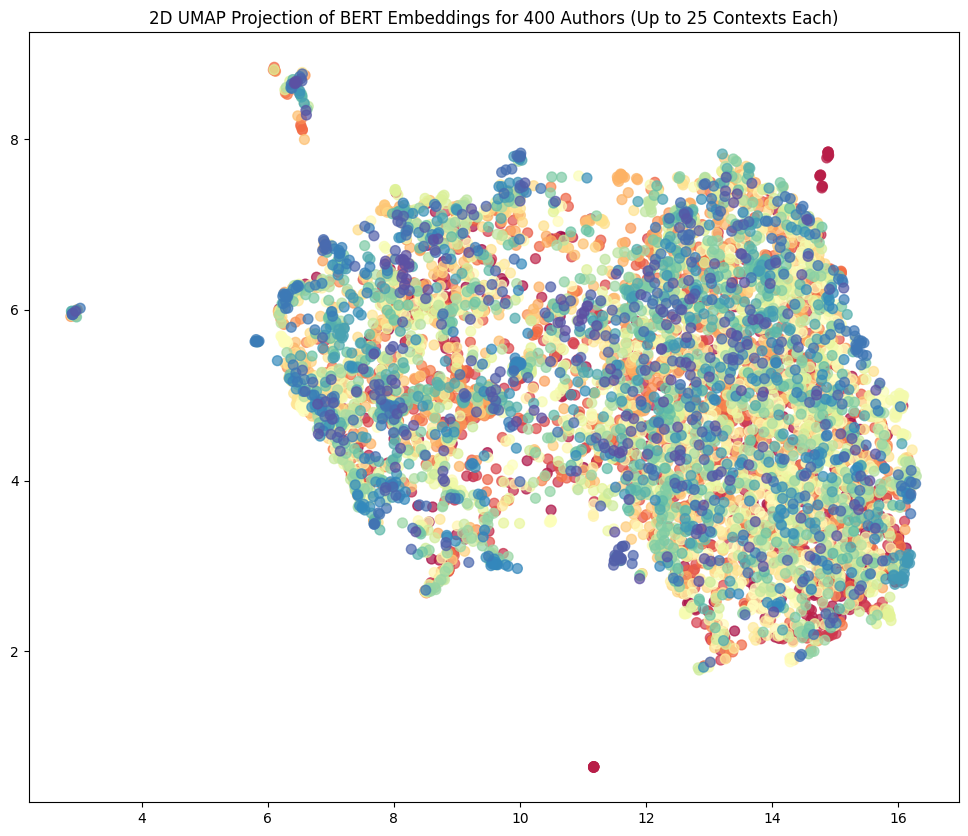

In [34]:
import umap
import matplotlib.pyplot as plt

umap_model_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings_2d = umap_model_2d.fit_transform(new_author_embeddings)

plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings_2d[:, 0], umap_embeddings_2d[:, 1], c=[new_labels.index(label) for label in new_labels], cmap='Spectral', s=50, alpha=0.7)

plt.title("2D UMAP Projection of BERT Embeddings for 400 Authors (Up to 25 Contexts Each)")
plt.show()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


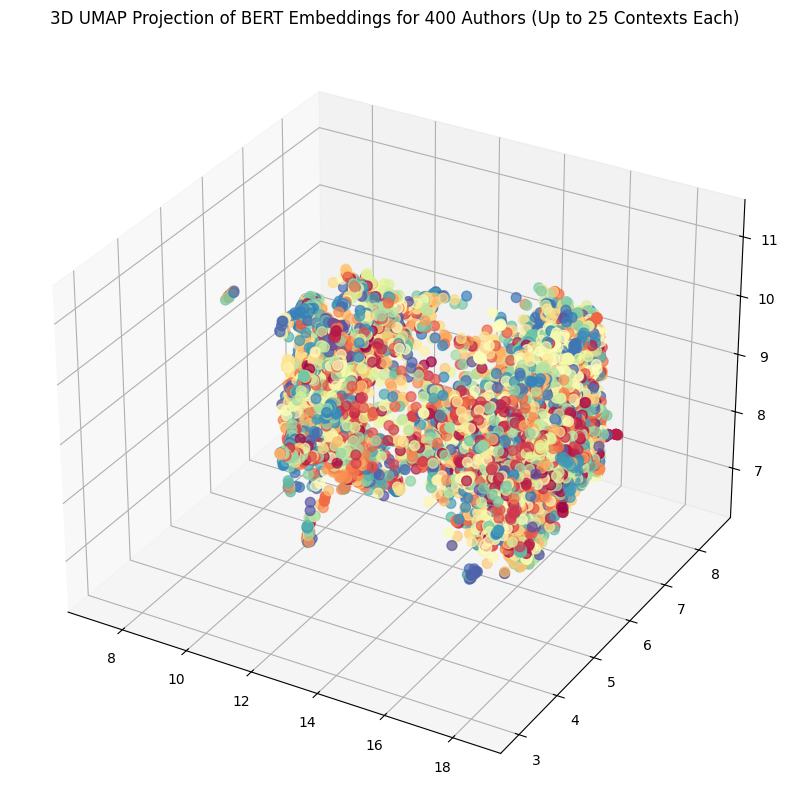

In [36]:
from mpl_toolkits.mplot3d import Axes3D

#  fit UMAP for 3D reduction
umap_model_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
umap_embeddings_3d = umap_model_3d.fit_transform(new_author_embeddings)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(umap_embeddings_3d[:, 0], umap_embeddings_3d[:, 1], umap_embeddings_3d[:, 2], 
                     c=[new_labels.index(label) for label in new_labels], cmap='Spectral', s=50, alpha=0.7)

ax.set_title("3D UMAP Projection of BERT Embeddings for 400 Authors (Up to 25 Contexts Each)")
plt.show()

In [37]:
from sklearn.cluster import KMeans


n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(new_author_embeddings)
print("K-means cluster centers:\n", kmeans.cluster_centers_)

K-means cluster centers:
 [[-0.30399513  0.7362728   0.4278609  ... -0.00399444  0.24337345
   0.31668293]
 [-0.23098919  0.901896    0.47446936 ...  0.3423294   0.11222154
   0.3228737 ]
 [-0.35149884  0.9512045   0.3443454  ...  0.24652226  0.8092321
   0.20942524]
 ...
 [-0.23595282  0.83941686  0.27608678 ...  0.04082777  0.25049108
   0.16867065]
 [-0.40191594  0.9641955   0.09216723 ...  0.16329008  0.63546073
   0.21945687]
 [-0.40518424  0.9668927   0.35702145 ...  0.41976142  0.79217905
   0.13904834]]


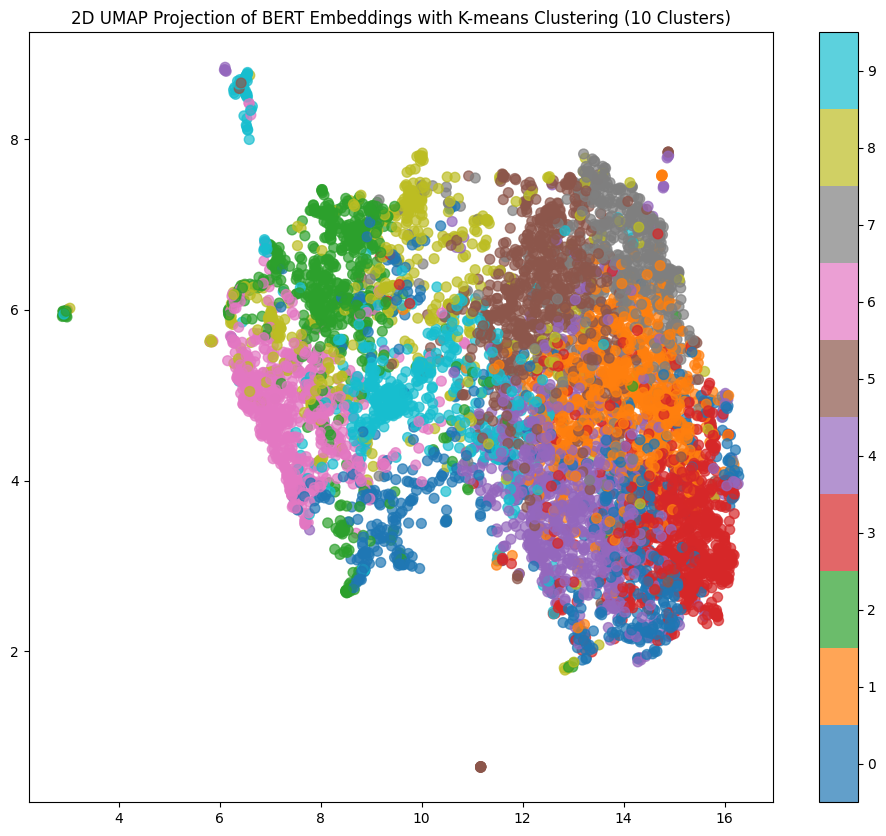

In [38]:
# UMAP has already been fit to the embeddings, so we visualize the 2D embedding with clusters
plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings_2d[:, 0], umap_embeddings_2d[:, 1], c=cluster_labels, cmap='tab10', s=50, alpha=0.7)

plt.colorbar(boundaries=np.arange(n_clusters + 1) - 0.5).set_ticks(np.arange(n_clusters))
plt.title(f"2D UMAP Projection of BERT Embeddings with K-means Clustering ({n_clusters} Clusters)")
plt.show()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


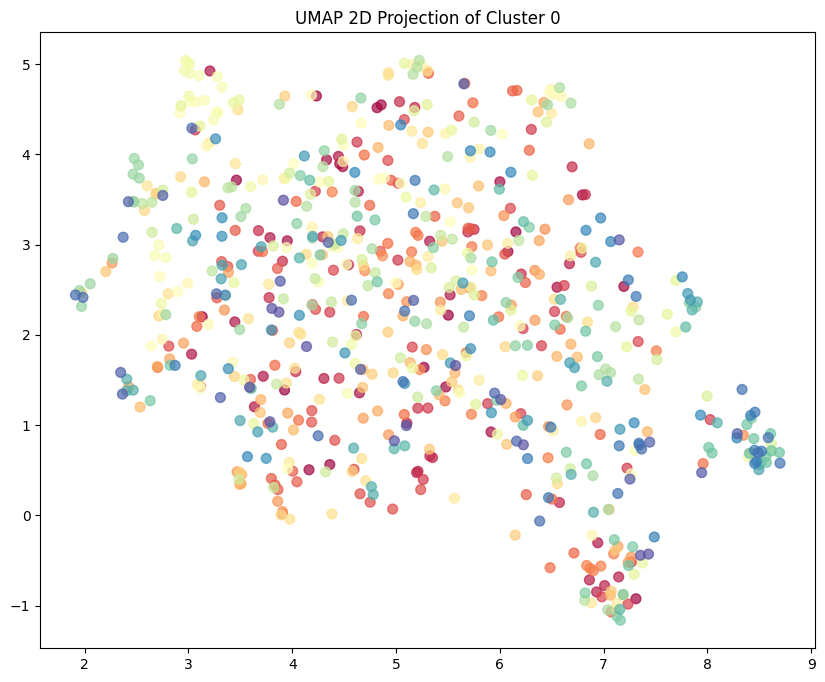

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


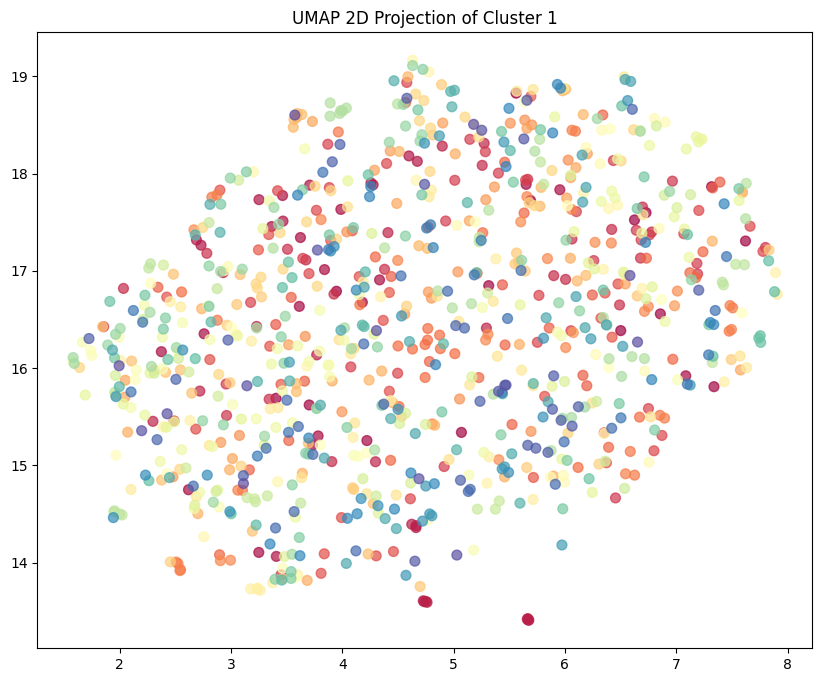

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


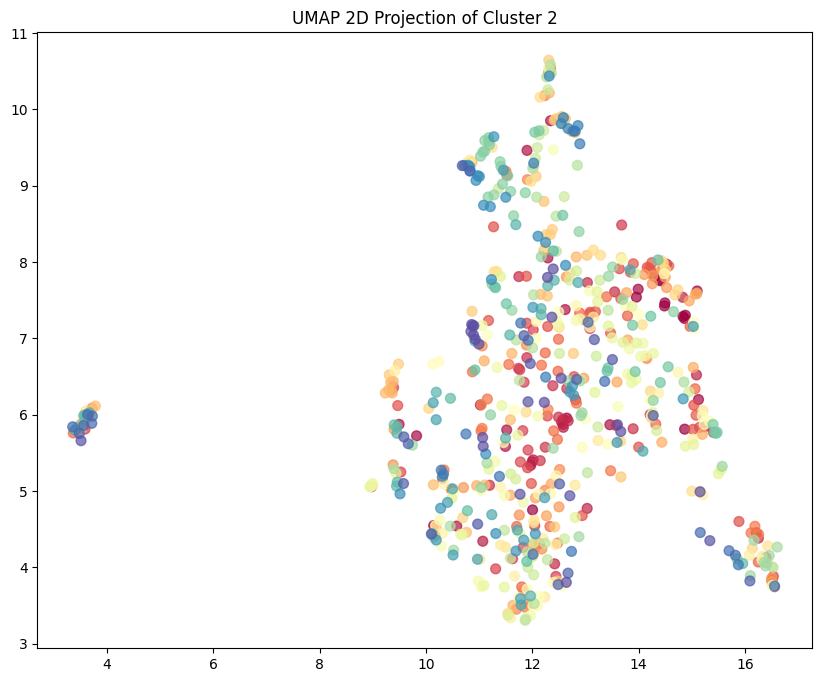

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


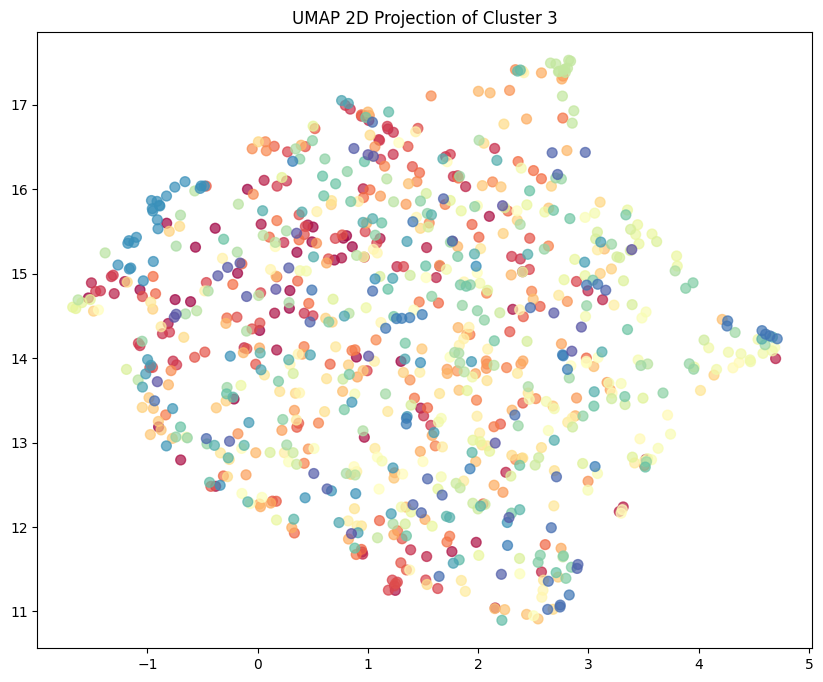

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


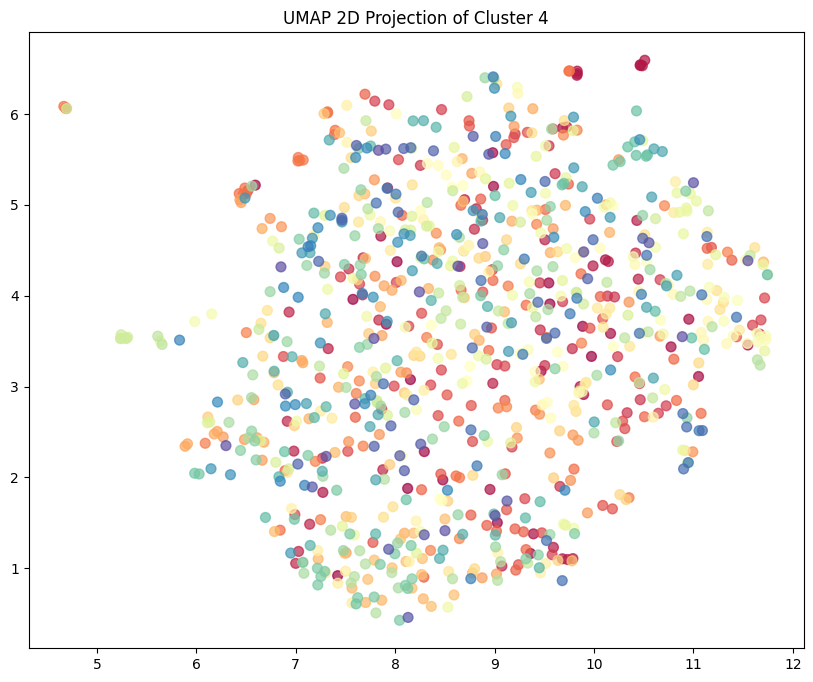

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


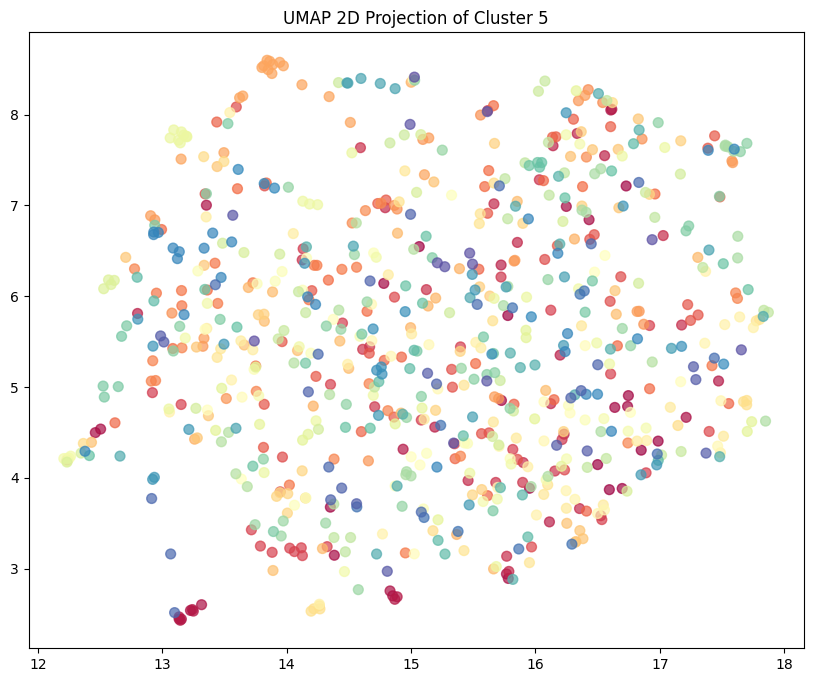

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


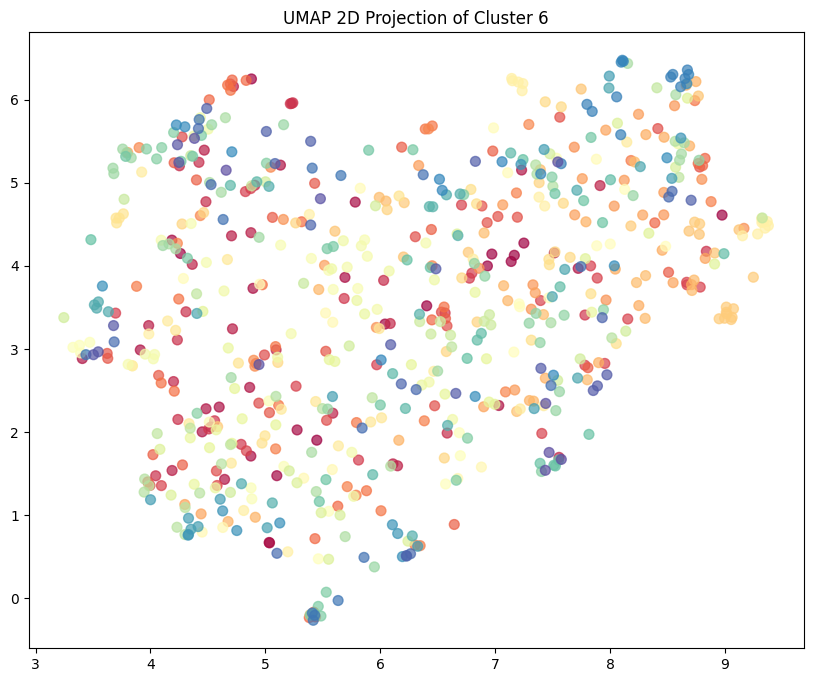

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


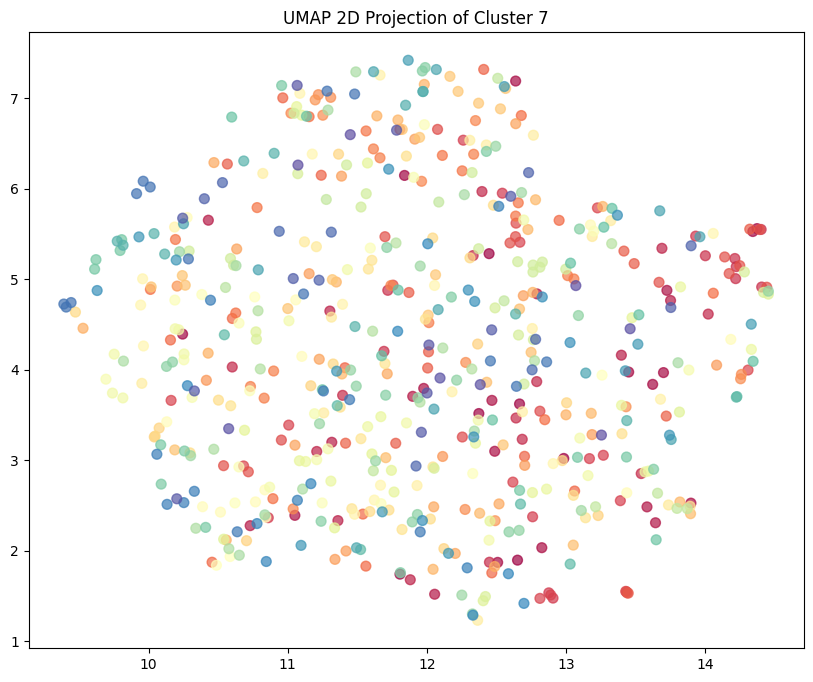

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


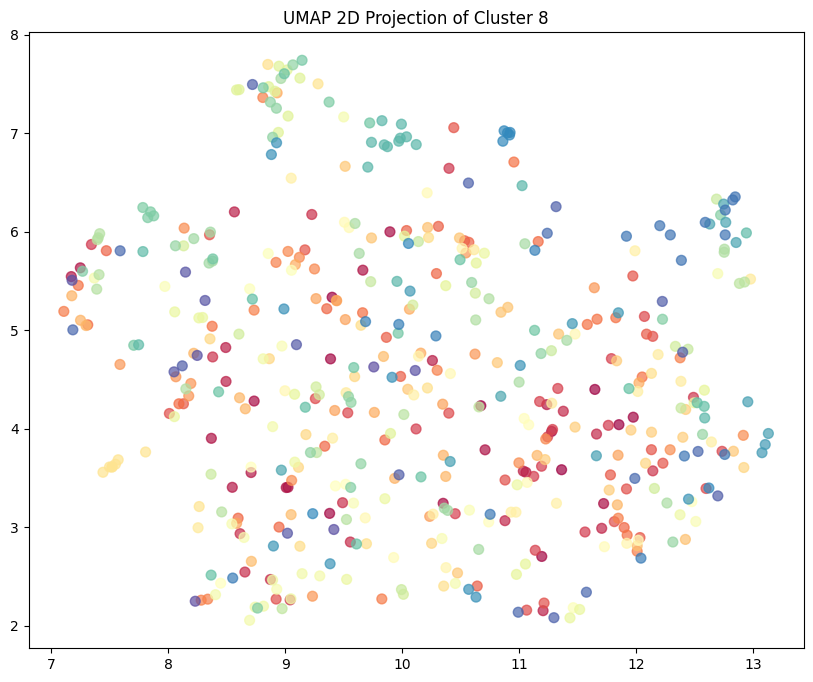

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


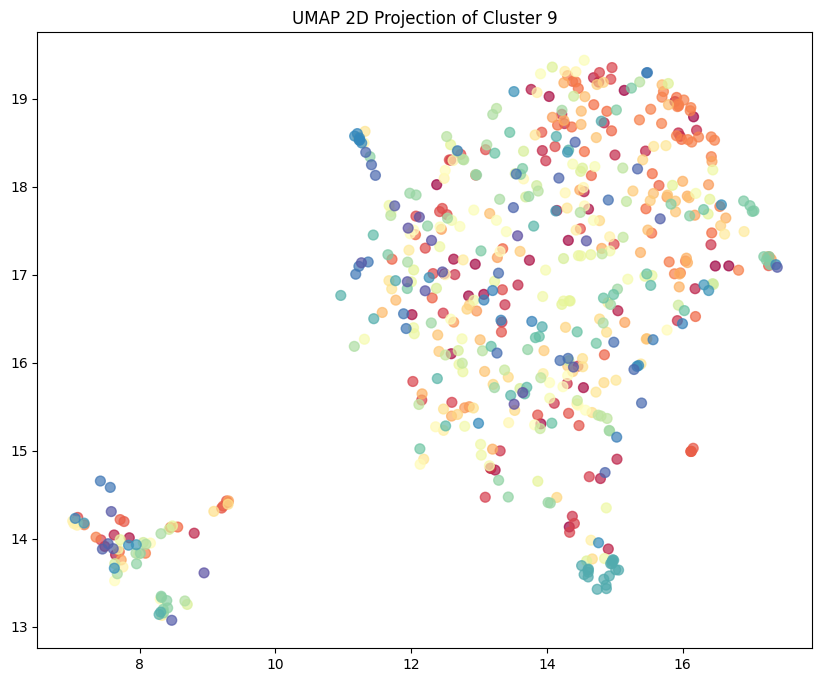

In [39]:
import umap
import matplotlib.pyplot as plt

# Step 1: Loop through each cluster and create a UMAP plot for each cluster
for cluster_num in range(n_clusters):
    # Step 2: Filter the embeddings and labels for the current cluster
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_num]
    cluster_embeddings = new_author_embeddings[cluster_indices]
    cluster_labels_subset = [new_labels[i] for i in cluster_indices]
    
    # Step 3: Apply UMAP to reduce the embeddings for this cluster to 2D
    umap_model_cluster = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings_cluster = umap_model_cluster.fit_transform(cluster_embeddings)
    
    # Step 4: Plot the UMAP visualization for this cluster
    plt.figure(figsize=(10, 8))
    plt.scatter(umap_embeddings_cluster[:, 0], umap_embeddings_cluster[:, 1], 
                c=[cluster_labels_subset.index(label) for label in cluster_labels_subset], cmap='Spectral', s=50, alpha=0.7)
    
    # Add title and labels
    plt.title(f"UMAP 2D Projection of Cluster {cluster_num}")
    plt.show()

In [40]:
# Cluster 9 focus
cluster_9_indices = [i for i, label in enumerate(cluster_labels) if label == 9]
cluster_9_embeddings = new_author_embeddings[cluster_9_indices]
cluster_9_labels = [new_labels[i] for i in cluster_9_indices]

print(f"Total number of embeddings in Cluster 9: {len(cluster_9_embeddings)}")

Total number of embeddings in Cluster 9: 583


In [41]:
n_sub_clusters = 10  # Number of sub-clusters

kmeans_sub = KMeans(n_clusters=n_sub_clusters, random_state=42)
sub_cluster_labels = kmeans_sub.fit_predict(cluster_9_embeddings)

print(f"Sub-cluster labels for Cluster 9: {sub_cluster_labels}")

Sub-cluster labels for Cluster 9: [3 9 8 1 1 8 0 9 7 9 9 6 7 9 9 9 0 6 6 3 4 3 4 4 6 6 0 6 1 9 7 4 5 3 0 2 8
 0 8 9 8 8 8 6 8 0 8 0 9 5 3 1 5 5 0 5 5 5 9 6 2 9 5 7 3 3 4 0 0 1 1 9 0 9
 6 0 5 9 9 9 9 9 4 9 9 9 6 7 7 7 7 5 1 4 1 1 7 7 4 1 1 7 7 7 9 9 0 8 8 0 6
 5 9 4 2 2 5 8 3 8 8 8 1 8 8 6 8 0 6 1 8 8 4 4 4 8 8 8 8 8 8 8 8 5 5 8 1 8
 8 8 8 8 8 8 8 8 5 1 8 2 2 0 9 6 8 1 1 1 8 1 4 1 6 9 6 0 8 2 5 8 1 5 8 8 5
 5 1 3 6 6 6 9 9 5 9 8 5 8 1 0 9 8 8 8 8 7 9 6 6 0 0 6 8 5 1 0 9 7 0 9 7 8
 2 7 7 7 7 6 2 7 3 8 1 5 7 1 7 9 2 7 7 5 9 9 1 1 6 6 7 5 5 8 8 9 5 5 4 9 7
 6 7 5 6 0 3 6 4 4 4 4 4 5 9 0 9 6 6 2 6 6 5 6 5 4 5 9 9 4 1 6 9 9 6 7 5 7
 7 7 5 6 9 9 6 0 6 6 9 9 4 0 6 7 9 9 6 5 6 9 2 5 6 9 4 5 0 3 5 8 9 5 7 9 9
 6 5 9 9 6 5 9 4 2 5 5 9 6 5 5 5 0 5 5 9 8 3 6 0 6 0 1 9 6 7 6 6 6 6 4 2 4
 6 9 5 8 8 6 7 7 7 7 9 9 5 5 5 1 0 7 7 7 7 9 5 5 9 0 5 6 9 6 1 4 6 6 7 7 9
 6 4 0 4 2 9 6 7 7 9 7 5 7 6 5 5 9 9 6 6 3 0 3 9 4 4 4 4 6 4 4 4 4 6 1 1 1
 1 1 0 9 8 9 8 8 5 5 5 5 1 7 2 5 5 7 2 8 8 8 6 7 0 0 7 5 5 6 7 7 9

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


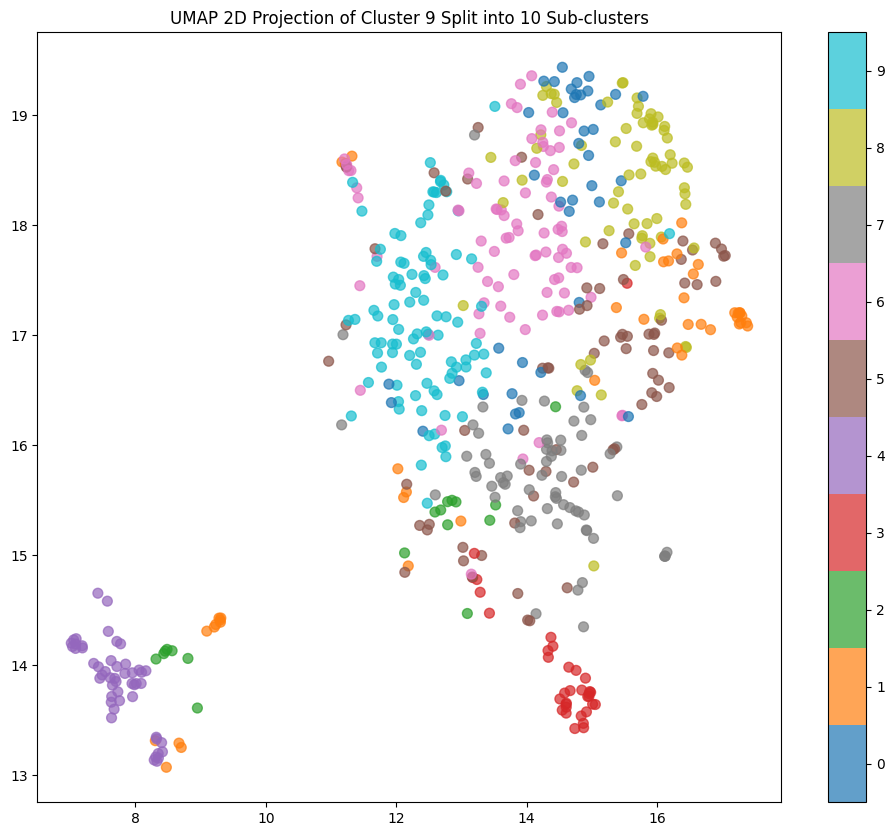

In [42]:

umap_model_cluster_9 = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings_cluster_9 = umap_model_cluster_9.fit_transform(cluster_9_embeddings)

plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings_cluster_9[:, 0], umap_embeddings_cluster_9[:, 1], 
            c=sub_cluster_labels, cmap='tab10', s=50, alpha=0.7)

plt.colorbar(boundaries=np.arange(n_sub_clusters + 1) - 0.5).set_ticks(np.arange(n_sub_clusters))
plt.title(f"UMAP 2D Projection of Cluster 9 Split into {n_sub_clusters} Sub-clusters")
plt.show()

In [44]:
# dictionary to store contexts, referencing authors, and referenced authors for each sub-cluster
sub_cluster_details = {i: [] for i in range(n_sub_clusters)}

# group contexts by sub-cluster with referencing and referenced authors
for i, sub_cluster_label in enumerate(sub_cluster_labels):
    # original row corresponding to this embedding in Cluster 9
    original_row = df.iloc[cluster_9_indices[i]]
    
    #  relevant info
    referencing_author = original_row['author_of_book']
    referenced_author = original_row['full_author_referenced']
    context = original_row['context']
    
    sub_cluster_details[sub_cluster_label].append((referencing_author, referenced_author, context))

# 3 context examples for each sub-cluster, along with referencing and referenced authors
for sub_cluster_num in range(n_sub_clusters):
    print(f"\nSub-cluster {sub_cluster_num}:\n")
    
    # 3 examples from each sub-cluster
    examples = sub_cluster_details[sub_cluster_num][:3]  # Get up to 3 examples
    for i, (referencing_author, referenced_author, context) in enumerate(examples):
        print(f"Context {i+1}:")
        print(f"Referencing Author: {referencing_author}, Referenced Author: {referenced_author}")
        print(f"Context Text: {context[:200]}...")  # Print the first 200 characters for readability
        print("\n")


Sub-cluster 0:

Context 1:
Referencing Author: Buchanan, Referenced Author: Holbach, Paul Henri Thiry, baron d'
Context Text: for and explain any of the phenomena of human nature. in this respect, his theory is precisely the same with that which has been already noticed; but the peculiarity by which it is distinguished from ...


Context 2:
Referencing Author: Buchanan, Referenced Author: Kant, Immanuel
Context Text: given of the phases which it has successively assumed, without reference to the powerful influence which his philosophy, in one or other of its constituent elements, has exerted on all his successors ...


Context 3:
Referencing Author: Ingersoll, Robert Green, Referenced Author: Origen
Context Text: placed beside it. clement of alexandria believed that hail storms, tempests and plagues were caused by demons. he also believed, with mr. talmage, that the events in the life of abraham were typical a...



Sub-cluster 1:

Context 1:
Referencing Author: Buchanan, Referenced A

In [3]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm
import torch

def batch_zero_shot_classification(texts, categories, batch_size=32, device=-1):
    """
    Perform zero-shot classification in memory-efficient batches.
    
    Parameters:
    texts (list): List of texts to classify
    categories (list): List of category labels
    batch_size (int): Number of texts to process at once
    device (int): -1 for CPU, 0+ for specific GPU
    
    Returns:
    list: Predicted categories for each text
    """
    # Initialize the classifier
    classifier = pipeline(
        "zero-shot-classification",
        model="facebook/bart-large-mnli",
        device=device
    )
    
    # Process in batches
    predictions = []
    
    # Create batches
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]
        
        try:
            # Process each text in the batch
            batch_predictions = []
            for text in batch:
                # Handle potential NaN or invalid entries
                if pd.isna(text) or not isinstance(text, str):
                    batch_predictions.append("unknown")
                    continue
                    
                # Truncate extremely long texts to prevent memory issues
                truncated_text = text[:512]
                
                result = classifier(
                    truncated_text,
                    categories,
                    multi_label=False
                )
                batch_predictions.append(result['labels'][0])
                
            predictions.extend(batch_predictions)
            
        except Exception as e:
            print(f"Error processing batch {i}-{i+batch_size}: {str(e)}")
            # Fill failed batch with "unknown"
            predictions.extend(["unknown"] * len(batch))
            
        # Clear CUDA cache if using GPU
        if device >= 0:
            torch.cuda.empty_cache()
            
    return predictions

categories = [
    "ethics",
    "metaphysics", 
    "epistemology",
    "political philosophy",
    "logic",
    "aesthetics"
]



In [6]:
from transformers import pipeline
import pandas as pd
import gc
import time
import torch

def classify_single_text(text, categories, classifier):
    """Classify a single text with error handling."""
    try:
        if pd.isna(text) or not isinstance(text, str):
            return "unknown"
            
        # Truncate text even more aggressively
        truncated_text = text[:256]  # Even shorter limit
        
        result = classifier(truncated_text, categories, multi_label=False)
        return result['labels'][0]
        
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return "unknown"

def process_texts_carefully(texts, categories, max_samples=100):
    """
    Process texts one at a time with careful memory management.
    
    Parameters:
    texts (list): List of texts to classify
    categories (list): Category labels
    max_samples (int): Maximum number of samples to process
    """
    # Load classifier with minimal memory settings
    classifier = pipeline(
        "zero-shot-classification",
        model="facebook/bart-large-mnli",
        device=-1,  # Force CPU
        model_kwargs={"low_cpu_mem_usage": True}
    )
    
    results = []
    
    # Process only up to max_samples
    for i, text in enumerate(texts[:max_samples]):
        # Process single text
        prediction = classify_single_text(text, categories, classifier)
        results.append(prediction)
        
        # Print progress
        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1} texts")
            
        # Aggressive memory cleanup every few samples
        if (i + 1) % 5 == 0:
            gc.collect()
            torch.cuda.empty_cache()
            time.sleep(1)  # Give system time to clean up
            
    return results

# Test with minimal data first
categories = [
    "ethics",
    "metaphysics", 
    "epistemology",
    "political philosophy",
    "logic",
    "aesthetics"
]


In [2]:
from transformers import pipeline
import pandas as pd

def classify_text(text, categories):
    """
    Classify a single text using a very small model.
    """
    try:
        # Use a tiny model instead of BART
        classifier = pipeline(
            "zero-shot-classification",
            model="cross-encoder/nli-distilroberta-base",
            device=-1
        )
        
        # Aggressively truncate text
        truncated_text = text[:128] if isinstance(text, str) else ""
        
        if not truncated_text:
            return "unknown"
            
        result = classifier(
            truncated_text,
            candidate_labels=categories
        )
        return result['labels'][0]
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return "unknown"

# Test with just one sample first
categories = ["ethics", "metaphysics", "epistemology"]  # Reduced categories

# Try with a single text
sample_text = df['context'].iloc[0]
result = classify_text(sample_text, categories)
print(f"Category: {result}")

config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Category: ethics


model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

In [4]:
from transformers import pipeline
import pandas as pd
from tqdm.notebook import tqdm
from datetime import datetime
import time

def process_large_dataset(df, categories, batch_size=10, total_samples=500):
    """
    Process a larger dataset with detailed progress tracking.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'context' column
    categories (list): List of categories to classify into
    batch_size (int): Number of texts to process before recreating classifier
    total_samples (int): Total number of samples to process
    
    Returns:
    pd.DataFrame: Results with predictions and metadata
    """
    print(f"Starting classification of {total_samples} samples at {datetime.now().strftime('%H:%M:%S')}")
    
    # Initialize tracking variables
    all_predictions = []
    all_confidences = []
    error_count = 0
    start_time = time.time()
    
    # Limit to specified number of samples
    df_subset = df.head(total_samples)
    
    # Process in batches
    for i in tqdm(range(0, len(df_subset), batch_size), desc="Processing batches"):
        batch_start_time = time.time()
        
        # Get batch of texts
        batch_texts = df_subset['context'].iloc[i:i+batch_size]
        
        try:
            # Create fresh classifier for each batch
            classifier = pipeline(
                "zero-shot-classification",
                model="cross-encoder/nli-distilroberta-base",
                device=-1
            )
            
            # Process each text in the batch
            batch_predictions = []
            batch_confidences = []
            
            for text in batch_texts:
                try:
                    # Truncate and verify text
                    truncated_text = text[:128] if isinstance(text, str) else ""
                    
                    if not truncated_text:
                        batch_predictions.append("unknown")
                        batch_confidences.append(0.0)
                        continue
                    
                    result = classifier(
                        truncated_text,
                        candidate_labels=categories
                    )
                    batch_predictions.append(result['labels'][0])
                    batch_confidences.append(round(result['scores'][0], 3))
                    
                except Exception as e:
                    print(f"Error processing individual text: {str(e)}")
                    batch_predictions.append("error")
                    batch_confidences.append(0.0)
                    error_count += 1
            
            all_predictions.extend(batch_predictions)
            all_confidences.extend(batch_confidences)
            
            # Free up memory
            del classifier
            
            # Report batch statistics
            batch_time = time.time() - batch_start_time
            if (i/batch_size) % 5 == 0:  # Report every 5 batches
                print(f"\nBatch {i//batch_size + 1} processed in {batch_time:.1f} seconds")
                print(f"Current error rate: {(error_count/len(all_predictions))*100:.1f}%")
            
        except Exception as e:
            print(f"\nError processing batch starting at index {i}: {str(e)}")
            # Fill batch with errors
            all_predictions.extend(["error"] * len(batch_texts))
            all_confidences.extend([0.0] * len(batch_texts))
            error_count += len(batch_texts)
    
    # Create results dataframe
    df_results = df_subset.copy()
    df_results['predicted_category'] = all_predictions
    df_results['confidence'] = all_confidences
    
    # Calculate and display summary statistics
    total_time = time.time() - start_time
    print("\n=== Classification Complete ===")
    print(f"Total processing time: {total_time/60:.1f} minutes")
    print(f"Average time per sample: {total_time/len(df_results):.2f} seconds")
    print(f"Total errors: {error_count} ({(error_count/len(df_results))*100:.1f}%)")
    print("\nCategory Distribution:")
    print(df_results['predicted_category'].value_counts())
    print("\nConfidence Statistics:")
    print(df_results['confidence'].describe())
    
    return df_results

# Define categories
categories = [
    "ethics",
    "metaphysics", 
    "epistemology",
    "political philosophy",
    "logic",
    "aesthetics"
]

# Process 500 samples
results_df = process_large_dataset(
    df, 
    categories,
    batch_size=10,
    total_samples=500
)

# show interesting results
print("\nMost confident classifications:")
print(results_df.nlargest(5, 'confidence')[['context', 'predicted_category', 'confidence']])

# save results to avoid reprocessing
results_df.to_csv('philosophy_classifications.csv', index=False)

Starting classification of 500 samples at 21:05:15


Processing batches:   0%|          | 0/50 [00:00<?, ?it/s]


Batch 1 processed in 2.6 seconds
Current error rate: 0.0%

Batch 6 processed in 2.0 seconds
Current error rate: 0.0%

Batch 11 processed in 1.6 seconds
Current error rate: 0.0%

Batch 16 processed in 1.6 seconds
Current error rate: 0.0%

Batch 21 processed in 1.6 seconds
Current error rate: 0.0%

Batch 26 processed in 1.8 seconds
Current error rate: 0.0%

Batch 31 processed in 1.6 seconds
Current error rate: 0.0%

Batch 36 processed in 1.7 seconds
Current error rate: 0.0%

Batch 41 processed in 1.6 seconds
Current error rate: 0.0%

Batch 46 processed in 1.9 seconds
Current error rate: 0.0%

=== Classification Complete ===
Total processing time: 1.4 minutes
Average time per sample: 0.17 seconds
Total errors: 0 (0.0%)

Category Distribution:
predicted_category
logic                   196
metaphysics             124
epistemology             78
ethics                   51
aesthetics               47
political philosophy      4
Name: count, dtype: int64

Confidence Statistics:
count    500

In [5]:
# Sample 20 random results and display them in a readable format
import pandas as pd
import numpy as np

def display_classifications(df, n=20):
    """
    Display n random classifications in a readable format.
    
    Parameters:
    df (pd.DataFrame): DataFrame with results
    n (int): Number of examples to show
    """
    # Sample n random rows
    sample_df = df.sample(n, random_state=42)
    
    print(f"\n=== {n} Sample Classifications ===\n")
    
    for idx, row in enumerate(sample_df.itertuples(), 1):
        print(f"{idx}. Category: {row.predicted_category.upper()}")
        print(f"   Confidence: {row.confidence:.2f}")
        print(f"   Context: {row.context[:200]}...")  # Show first 200 chars
        print("-" * 80)  # Separator line
        print()  # Blank line

# Display 20 random examples
display_classifications(results_df, n=20)


=== 20 Sample Classifications ===

1. Category: LOGIC
   Confidence: 0.20
   Context: own bodies and souls is denied, except in so far as they are mere "modes" or affections of the one uncreated "substance," which is known, not by experience or observation, but by a transcendental facu...
--------------------------------------------------------------------------------

2. Category: LOGIC
   Confidence: 0.27
   Context: ill cordially sympathize. he knows that there can be no practical religion without faith in providence and confidence in prayer; for "he that cometh to god must believe that he is, and that he is _the...
--------------------------------------------------------------------------------

3. Category: AESTHETICS
   Confidence: 0.37
   Context: osophiques," preface, second edition, p. xxvii.; "nouveaux fragments," pp. 9, 160. [105] m. ad. franck, "de la certitude," preface, p. xxi. [106] m. a. javari, "de la certitude," p. 509. [107] amand s...
------------------------------

In [6]:
def display_detailed_classifications(df, n=20):
    """
    Display n random classifications with author information.
    
    Parameters:
    df (pd.DataFrame): DataFrame with results
    n (int): Number of examples to show
    """
    # Sample n random rows
    sample_df = df.sample(n, random_state=42)
    
    print(f"\n=== {n} Sample Classifications with Author Information ===\n")
    
    for idx, row in enumerate(sample_df.itertuples(), 1):
        print(f"{idx}. PHILOSOPHICAL CATEGORY: {row.predicted_category.upper()}")
        print(f"   Confidence: {row.confidence:.2f}")
        print(f"   Referencing Author: {row.author_of_book}")
        print(f"   Referenced Author: {row.full_author_referenced}")
        print(f"   Context: {row.context[:200]}...")  # Show first 200 chars
        print("-" * 100)  # Separator line
        print()  # Blank line

# Display 20 random examples with author information
display_detailed_classifications(results_df, n=20)


=== 20 Sample Classifications with Author Information ===

1. PHILOSOPHICAL CATEGORY: LOGIC
   Confidence: 0.20
   Referencing Author: Buchanan
   Referenced Author: Spinoza, Benedictus de
   Context: own bodies and souls is denied, except in so far as they are mere "modes" or affections of the one uncreated "substance," which is known, not by experience or observation, but by a transcendental facu...
----------------------------------------------------------------------------------------------------

2. PHILOSOPHICAL CATEGORY: LOGIC
   Confidence: 0.27
   Referencing Author: Buchanan
   Referenced Author: Holyoake, Austin
   Context: ill cordially sympathize. he knows that there can be no practical religion without faith in providence and confidence in prayer; for "he that cometh to god must believe that he is, and that he is _the...
----------------------------------------------------------------------------------------------------

3. PHILOSOPHICAL CATEGORY: AESTHETICS
   Confidenc